In [1]:
# Cell 1: Install dependencies
!pip install -q ultralytics gdown matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.1 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.1 MB/s eta 0:00:00:00:0100:01


In [2]:
# Cell 2: Import libraries
from ultralytics import YOLO
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
import glob

os.makedirs('/kaggle/working/dataset/train', exist_ok=True)
os.makedirs('/kaggle/working/dataset/val', exist_ok=True)

!git clone https://github.com/ajmandourah/recaptcha-dataset /kaggle/working/public_dataset
!mv /kaggle/working/public_dataset/Training/* /kaggle/working/dataset/train/
!mv /kaggle/working/public_dataset/Validation/* /kaggle/working/dataset/val/
!rm -rf /kaggle/working/public_dataset
train_images = glob.glob('/kaggle/working/dataset/train/*/*.png')
val_images = glob.glob('/kaggle/working/dataset/val/*/*.png')
total_images = len(train_images) + len(val_images)
print(f"Fallback dataset: {len(train_images)} training images, {len(val_images)} validation images (Total: {total_images})")

print("Training dataset structure:")
!ls -la /kaggle/working/dataset/train | grep ^d
print("Validation dataset structure:")
!ls -la /kaggle/working/dataset/val | grep ^d
print(f"Dataset ready at /kaggle/working/dataset (Total: {total_images} images)")

Cloning into '/kaggle/working/public_dataset'...
remote: Enumerating objects: 11753, done.
remote: Total 11753 (delta 0), reused 0 (delta 0), pack-reused 11753 (from 1)
Receiving objects: 100% (11753/11753), 395.64 MiB | 60.71 MiB/s, done.
Updating files: 100% (11779/11779), done.
Fallback dataset: 11015 training images, 759 validation images (Total: 11774)
Training dataset structure:
drwxr-xr-x 14 root root   4096 Sep 27 18:15 .
drwxr-xr-x  4 root root   4096 Sep 27 18:15 ..
drwxr-xr-x  2 root root  36864 Sep 27 18:15 Bicycle
drwxr-xr-x  2 root root  20480 Sep 27 18:15 Bridge
drwxr-xr-x  2 root root  36864 Sep 27 18:15 Bus
drwxr-xr-x  2 root root 126976 Sep 27 18:15 Car
drwxr-xr-x  2 root root   4096 Sep 27 18:15 Chimney
drwxr-xr-x  2 root root  45056 Sep 27 18:15 Crosswalk
drwxr-xr-x  2 root root  36864 Sep 27 18:15 Hydrant
drwxr-xr-x  2 root root   4096 Sep 27 18:15 Motorcycle
drwxr-xr-x  2 root root   4096 Sep 27 18:15 Mountain
drwxr-xr-x  2 root root  45056 Sep 27 18:15 Other
drwx

In [ ]:
# Cell 4: Load pretrained model and train (fine-tune on dataset)
model = YOLO('/kaggle/input/18/pytorch/default/1/last (18).pt') 

results = model.train(
    data='/kaggle/working/dataset', 
    epochs=100,
    imgsz=224,
    batch=-1,
    name='recaptcha_cls',
    project='/kaggle/working/runs',
    save=True,
    plots=True, 
    resume = True
)

print("Training complete. Check /kaggle/working/runs/detect/train/ for logs/plots.")

Ultralytics 8.3.203 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/dataset, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/kaggle/input/18/pytorch/default/1/last (18).pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=recaptcha_cls2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patienc

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all       0.78      0.983
Speed: 0.1ms preprocess, 0.1ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /kaggle/working/runs/recaptcha_cls2
Training complete. Check /kaggle/working/runs/detect/train/ for logs/plots.


In [7]:
# Cell 5: Validate and print key metrics (top-1/top-5 accuracy)
val_results = model.val(data='/kaggle/working/dataset')

print(f"Validation Results:")
print(f"Top-1 Accuracy: {val_results.top1:.1%}")  
print(f"Top-5 Accuracy: {val_results.top5:.1%}") 

Ultralytics 8.3.203 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
train: /kaggle/working/dataset/train... found 11015 images in 12 classes ✅ 
val: /kaggle/working/dataset/val... found 759 images in 12 classes ✅ 
test: None...
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1308.0±344.1 MB/s, size: 35.6 KB)
val: Scanning /kaggle/working/dataset/val... 759 images, 0 corrupt: 100% ━━━━━━━━━━━━ 759/759 1.1Mit/s 0.0s0s
               classes   top1_acc   top5_acc: 100% ━━━━━━━━━━━━ 1/1 0.3it/s 3.8s


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all       0.78      0.984
Speed: 0.0ms preprocess, 0.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /kaggle/working/runs/recaptcha_cls23
Validation Results:
Top-1 Accuracy: 78.0%
Top-5 Accuracy: 98.4%


In [ ]:
# Cell 6: Plot and display confusion matrix
cm = val_results.confusion_matrix.matrix
class_names = val_results.names 

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for reCAPTCHA Classification (Top-1)')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

model.save('/kaggle/working/recaptcha_yolov8n-cls.pt')
print("Model saved. For inference: probs = model('path/to/image.jpg')")

AttributeError: 'ClassifyMetrics' object has no attribute 'names'. See valid attributes below.

    Class for computing classification metrics including top-1 and top-5 accuracy.

    Attributes:
        top1 (float): The top-1 accuracy.
        top5 (float): The top-5 accuracy.
        speed (dict): A dictionary containing the time taken for each step in the pipeline.
        task (str): The task type, set to 'classify'.

    Methods:
        process: Process target classes and predicted classes to compute metrics.
        fitness: Return mean of top-1 and top-5 accuracies as fitness score.
        results_dict: Return a dictionary with model's performance metrics and fitness score.
        keys: Return a list of keys for the results_dict property.
        curves: Return a list of curves for accessing specific metrics curves.
        curves_results: Provide a list of computed performance metrics and statistics.
        summary: Generate a single-row summary of classification metrics (Top-1 and Top-5 accuracy).
    

In [10]:
train_classes = sorted([os.path.basename(d) for d in glob.glob('/kaggle/working/dataset/train/*') if os.path.isdir(d)])
val_classes = sorted([os.path.basename(d) for d in glob.glob('/kaggle/working/dataset/val/*') if os.path.isdir(d)])
print(f"Training classes ({len(train_classes)}): {train_classes}")
print(f"Validation classes ({len(val_classes)}): {val_classes}")
if train_classes != val_classes:
    print("Warning: Training and validation classes differ!")
if len(train_classes) != 13:
    print(f"Warning: Expected 13 classes (Bicycle, Bridge, Bus, Car, Chimney, Crosswalk, Hydrant, Motorcycle, Mountain, Other, Palm, Stairs, Traffic Light), found {len(train_classes)}. Missing class may reduce accuracy.")

Training classes (12): ['Bicycle', 'Bridge', 'Bus', 'Car', 'Chimney', 'Crosswalk', 'Hydrant', 'Motorcycle', 'Mountain', 'Other', 'Palm', 'Traffic Light']
Validation classes (12): ['Bicycle', 'Bridge', 'Bus', 'Car', 'Chimney', 'Crosswalk', 'Hydrant', 'Motorcycle', 'Mountain', 'Other', 'Palm', 'Traffic Light']


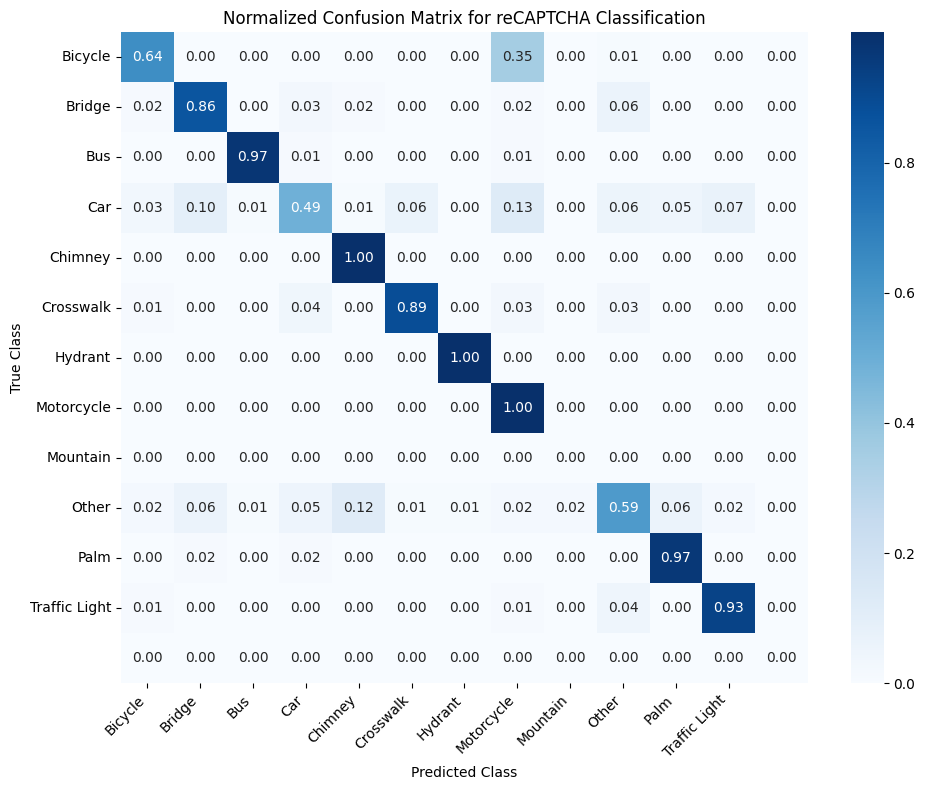

Model saved. For inference: probs = model('path/to/image.jpg')


In [ ]:
cm = val_results.confusion_matrix.matrix
class_names = train_classes
cm_normalized = cm / (cm.sum(axis=1, keepdims=True) + 1e-6) 

plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Normalized Confusion Matrix for reCAPTCHA Classification')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

model.save('/kaggle/working/recaptcha_yolov8n-cls.pt')
print("Model saved. For inference: probs = model('path/to/image.jpg')")